In [1]:
Packages <- c("dplyr","ggthemes","pracma","cubature","data.table", "gridExtra","viridis", "ggsignif", "broom", "ggpubr", "caret","cowplot","ggplot2","fields","bbmle", "dplyr", "tidyr", "lubridate", "RColorBrewer")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/parentage/kernel_fitting/')
load("~/parentage/r_data/site_dist_info.RData")

#final scripts to use
source("~/parentage/kernel_fitting/1340_loci/functions/ll_kt_both_bbmle.R")
source("~/parentage/kernel_fitting/1340_loci/functions/ll_kt_both_grid_search.R")
source("~/parentage/kernel_fitting/1340_loci/functions/ll_kt_both_optim.R")
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum0.5.R")
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum1.R")

"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0

In [35]:
#read in data
kernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/kernel_fitting_summary.csv", stringsAsFactors = F, header=T)

mdd12 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_2012.csv", header=T) %>%
    mutate(Year="2012")
mdd13 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_2013.csv", header=T) %>%
    mutate(Year="2013")
mdd14 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_2014.csv", header=T) %>%
    mutate(Year="2014")
mdd15 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_2015.csv", header=T) %>%
    mutate(Year="2015")
mdd16 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_2016.csv", header=T) %>%
    mutate(Year="2016")
mdd17 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_2017.csv", header=T) %>%
    mutate(Year="2017")
mdd18 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_2018.csv", header=T) %>%
    mutate(Year="2018")
mddall <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/MeanDispDist95CI_all.csv", header=T) %>%
    mutate(Year="2012-18")

profile12_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2012.csv", header=T) %>%
        filter(k_eval <=10 & k_eval >=-10 & theta_eval <=5)
profile13_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2013.csv", header=T) %>%
        filter(k_eval <=10 & k_eval >=-10 & theta_eval <=5)
profile14_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2014.csv", header=T) 
profile15_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2015.csv", header=T) %>%
        filter(k_eval <=10 & k_eval >=-10 & theta_eval <=5)
profile16_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2016.csv", header=T) 
profile17_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2017.csv", header=T)
profile18_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_2018.csv", header=T) 
profileall_95 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/likelihood_profiles_grid_search/profile95CI_AllYears.csv", header=T) 


In [43]:
min(mdd14_df$mdd)

[1] 5.646667

In [66]:
cubintegrate(integrate_kernel_sum0.5, k=-.89, theta=.56, 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=-2.6, theta=1.58, 0, 30, method = "pcubature")$integral


[1] 0.4674363

[1] 0.4941126

In [39]:
#search and replace for years
mdd17_df <- bind_cols(profile17_95, mdd17)


In [17]:
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[1], theta=kernels$best_theta[1], 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[2], theta=kernels$best_theta[2], 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[3], theta=kernels$best_theta[3], 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[4], theta=kernels$best_theta[4], 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[5], theta=kernels$best_theta[5], 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[6], theta=kernels$best_theta[6], 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[7], theta=kernels$best_theta[7], 0, 30, method = "pcubature")$integral
cubintegrate(integrate_kernel_sum0.5, k=kernels$best_k[8], theta=kernels$best_theta[8], 0, 30, method = "pcubature")$integral


[1] 0.4745785

[1] 0.3319391

[1] 0.4325933

[1] 0.4652819

[1] 0.4999477

[1] 0.3925255

[1] 0.4968728

[1] 0.4948548

In [18]:
min12 <- min(mdd12_df$log_like)
mdd12_weighted <- mdd12_df %>%
        mutate(deviation=min12/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2012")

min13 <- min(mdd13_df$log_like)
mdd13_weighted <- mdd13_df %>%
        mutate(deviation=min13/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2013")

min14 <- min(mdd14_df$log_like)
mdd14_weighted <- mdd14_df %>%
        mutate(deviation=min14/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2014")
min15 <- min(mdd15_df$log_like)
mdd15_weighted <- mdd15_df %>%
        mutate(deviation=min15/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2015")
min16 <- min(mdd16_df$log_like)
mdd16_weighted <- mdd16_df %>%
        mutate(deviation=min16/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2016")
min17 <- min(mdd17_df$log_like)
mdd17_weighted <- mdd17_df %>%
        mutate(deviation=min17/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2017")
min18 <- min(mdd18_df$log_like)
mdd18_weighted <- mdd18_df %>%
        mutate(deviation=min18/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2018")

minall <- min(mddall_df$log_like)
mddall_weighted <- mddall_df %>%
        mutate(deviation=minall/log_like) %>%
        sample_n(size=1000, weight=deviation, replacement=T) %>%
        mutate(Year="2012-18")

In [19]:
all_mdd <- bind_rows(mdd12_weighted, mdd13_weighted, mdd14_weighted, mdd15_weighted, mdd16_weighted, mdd17_weighted, mdd18_weighted, mddall_weighted) %>%
    mutate(Year=as.factor(Year)) %>%
    arrange(Year)%>%
    mutate(Year=factor(Year, levels=c("2012-18", "2018", "2017", "2016", "2015", "2014", "2013", "2012"))) %>%
    arrange(Year)
#levels(all_mdd$Year) <- c("2012-18", "2018", "2017", "2016", "2015", "2014", "2013", "2012")


Warning message:
“Removed 1374 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1374 rows containing non-finite values (stat_ydensity).”

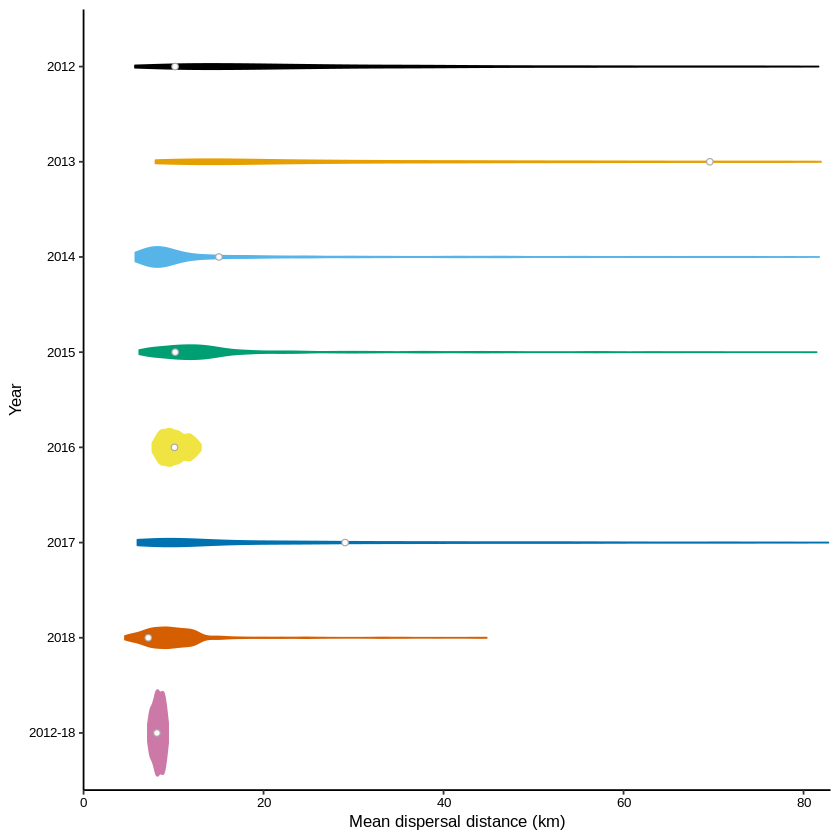

In [21]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

mdd_violin <- ggplot(data=all_mdd, aes(x=Year, y=mdd, color=Year, fill=Year), alpha=0.5) +
    geom_violin() +
    geom_point(data=kernels, aes(x=Year, y=MeanDispDist), fill="snow",color="darkgray", shape=21) +
    coord_flip() +
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 83), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica"),    
    legend.position = "none") + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
#ggplot2::ggsave(filename="All95CIMeanDispDistanceViolin_pub.pdf",  plot=mdd_violin, width=83, height=70, units="mm", path="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/")


In [29]:
min18 <- min(profile18_95$log_like)



In [30]:
#what does the distribution of kurtosis show?
kurt12 <- profile12_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3) %>%
    mutate(deviation=min12/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2012")

kurt13 <- profile13_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3)%>%
    mutate(deviation=min13/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2013")

kurt14 <- profile14_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3) %>%
    mutate(deviation=min14/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2014")

kurt15 <- profile15_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3)%>%
    mutate(deviation=min15/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2015")

kurt16 <- profile16_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3) %>%
    mutate(deviation=min16/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2016")

kurt17 <- profile17_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3)%>%
    mutate(deviation=min17/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2017")

kurt18 <- profile18_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3)%>%
    mutate(deviation=min18/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2018")

kurt_all <- profileall_95 %>%
    mutate(kurtosis = ((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3)%>%
    mutate(deviation=minall/log_like) %>%
    sample_n(size=1000, weight=deviation, replacement=T) %>%
    mutate(Year="2012-18")




In [31]:
all_kurt <- bind_rows(kurt12, kurt13, kurt14, kurt15, kurt16, kurt17, kurt18, kurt_all) %>%
    #mutate(Year=as.character(Year)) %>%
    mutate(kurtosis_qual=ifelse(kurtosis > 0, "Leptokurtic", "Playkurtic")) %>%
    mutate(log_kurt=log(kurtosis+2))


In [32]:
mle_kurt <- kernels %>%
    select(Year, best_theta) %>%
    mutate(kurt=((gamma(5/best_theta)*gamma(1/best_theta))/gamma(3/best_theta)^2)-3) %>%
    mutate(log_kurt=log(kurt+2))
#summary(all_kurt$kurtosis)
mle_kurt
summary(all_kurt$log_kurt)

Year,best_theta,kurt,log_kurt
2012,1.03,2.7576387,1.55975148
2013,0.22,1008.9403696,6.91863624
2014,0.38,59.8625346,4.12491474
2015,0.67,9.1264042,2.40932104
2016,5.00,-0.9299017,0.06775054
2017,0.26,363.3327201,5.90080850
2018,1.37,1.1060033,1.13333680
2012-18,1.49,0.7852233,1.02432805


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.06775  0.72398  1.80636  3.06053  4.71016 14.85349 

In [71]:
theta_eval=1.58
((gamma(5/theta_eval)*gamma(1/theta_eval))/gamma(3/theta_eval)^2)-3

[1] 0.5914121

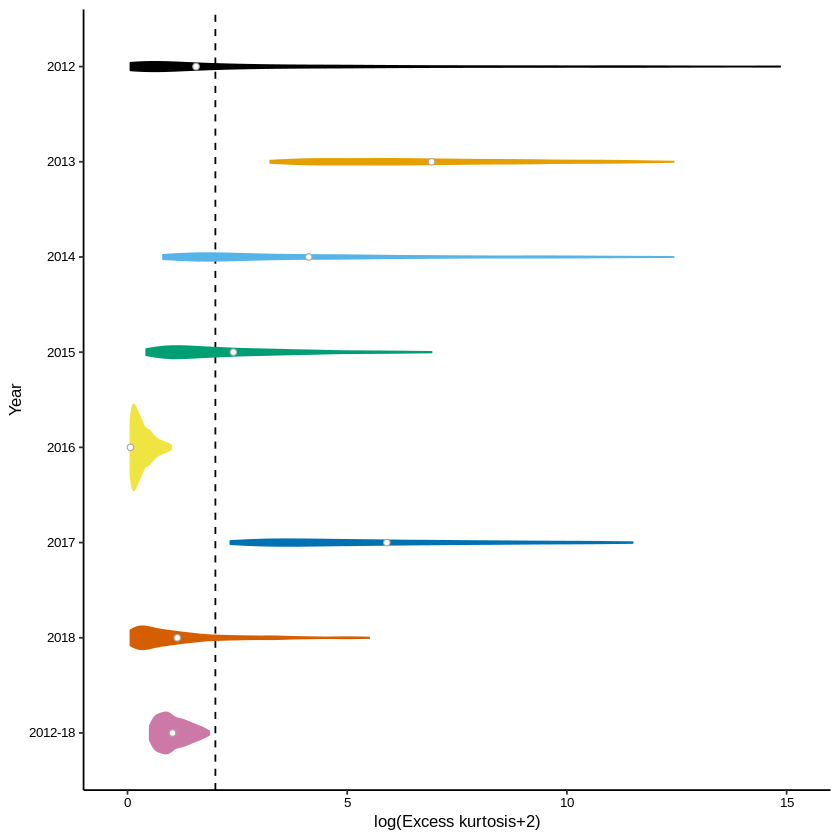

In [50]:
cbbPalette <- rev(c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"))
all_kurt$Year <- factor(all_kurt$Year, levels=rev(c("2012", "2013", "2014", "2015", "2016", "2017", "2018", "2012-18")))

kurt_violin <- ggplot(data=all_kurt, aes(x=Year, y=log_kurt, color=Year, fill=Year), alpha=0.5) +
    geom_hline(yintercept = 2, linetype="dashed") + 
    geom_violin() +
    geom_point(data=mle_kurt, aes(x=Year, y=log_kurt), fill="snow",color="darkgray", shape=21) +
    coord_flip() +
    scale_y_continuous(limits = c(-1, 16), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("log(Excess kurtosis+2)") + 
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica"), 
    legend.position = "none") + 
    scale_colour_manual(values=cbbPalette)+
    scale_fill_manual(values=cbbPalette)


kurt_violin

In [53]:
ggplot2::ggsave(filename="KurtosisViolin_pub.pdf",  plot=kurt_violin, width=83, height=70, units="mm", path="~/parentage/kernel_fitting/1340_loci/final_results/mean_disp_dist/")



In [60]:
log(x+2)=y
exp(y)=x+2
exp(y)-2=x

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


In [56]:
max(all_kurt$kurtosis)

[1] 2823513

In [58]:
10^15 == 10


[1] 1e+15

In [59]:
log(1e+15)

[1] 34.53878

In [64]:
exp(15)-2

[1] 3269015

In [62]:
log(146)

[1] 4.983607